## Math 156, Programming Assignment 1, Spring 2025.
### (due Sunday, Feb 16, 6:00 PM)

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Part 1. (8 points)  Extrema of a Cubic Polynomial

Write a program to take 6 numbers $a, b, c, d, e, f$ and find the locations
$x_{\text{min}}$ and $x_{\text{max}}$ of the (global) extrema of the function 

$$p(x) = cx^3 + dx^2 + ex + f$$

over the interval $[a,b]$. Recall that global extrema occur at critical points or endpoints.

Use the appropriate version of the quadratic formula from Lecture 4 (which depends on the parameters $c,d,e$) to avoid unnecessary cancellation of digits when searching for critical points inside the interval. If the solutions are not unique, you can report any of them. Do not use Python packages such as scipy.optimize or numpy.roots to optimize $p(x)$ or solve quadratic equations.

I've included some starter code to help you design the task and visualize your results. Feel free to use it, modify it, or completely write your own. In particular, feel free to add additional subroutines if that helps. The return value of polyMinMax should be a row vector containing $[x_\text{min},x_\text{max},p(x_\text{min}),p(x_\text{max})]$.

**Deliverables:**

- Include all the code you wrote, used, or modified. (Just edit this file)
- Report the extrema and plots returned by your code for the test cases at the bottom of this section. (Just run the code I provided below)
- Explain your algorithm: what are the various cases that need to be tested for? You may assume $a<b$, but otherwise the numbers $a,b,c,d,e,f$ are arbitrary double-precision numbers in the normalized range, with 0 allowed.

In [6]:
def p3(cc, xx):
    """
    This function evaluates a cubic polynomial
    
      p(x) = cc[0]*x^3 + cc[1]*x^2 + cc[2]*x + cc[3]
    
    at xx (or at each x in xx). The most accurate way to evaluate p(x) is via Horner's rule
      
      p(x) = cc[3] + x*(cc[2] + x*(cc[1] + x*cc[0])))
    
    here xx can be a float or an np.array of floats
    """
    
    c, d, e, f = cc
    return f + xx*(e + xx*(d + xx*c))


def polyMinMax(interval, coeffs) -> np.array(float):
    """ 
    This function finds the (global) extrema over [a,b] of the cubic function 
    p(x) = cx^3 + dx^2 + ex + f
    and returns an np array [x_min, x_max, p(x_min), p(x_max)]
    """
    a, b = interval
    c, d, e, f = coeffs
    xx = np.array([a,b])  # xx = candidates for global extrema. start with endpoints

    if c == 0:
        if d != 0:
            x1 = -e/(2 * d)
            if x1>a and x1<b:
                xx = np.append(xx,x1)
    elif e == 0:
        # p' = (3cx+2d)x
        x1 = -2*d/(3*c)
        if 0>a and 0<b:
            xx = np.append(xx, 0.0)
        if x1>a and x1<b:
            xx = np.append(xx,x1)
        
    else:
        discriminant = 4 * d * d - 12 * c * e
        if discriminant == 0.0:
            x1 = -2 * d / (6 * c)
            if x1>a and x1<b:
                xx = np.append(xx, x1)
        elif discriminant>0.0:
            if d>=0.0:
                x1 = (-2 * d - discriminant)/(6 * c)
                x2 = 2 * e/(-2 * d - discriminant)
            else:
                x1 = (-2 * d + discriminant)/(6 * c)
                x2 = 2 * e/(-2 * d + discriminant)
            if x1>a and x1<b:
                xx = np.append(xx, x1)
            if x2>a and x2<b:
                xx = np.append(xx, x2)
    # for each critical point you find between a and b, add it to xx via
    # xx = np.append(xx,x1)
                
    p = p3([c,d,e,f],xx)

    i = np.argmin(p)
    j = np.argmax(p)
    return np.array([xx[i],xx[j],p[i],p[j]])

In [7]:
## Here are the test cases to report. Just run this block

ab1 = [0,2];      cc1 = [1,-2,-1,1]
ab2 = [-2,1];     cc2 = [4,8,-4,-2]
ab3 = [-1,2];     cc3 = [1,0,1,-3]
ab4 = [-0.3,0.6]; cc4 = [4.0e-15,-9,3,0]
ab5 = [-1,2];     cc5 = [0,0,0,1.7]
ab6 = [-0.5,3];   cc6 = [-3,9,4.0e-15,0]
ab7 = [0.6,1];    cc7 = [0,-2,3,-1]
ab8 = [-1.8,0.7]; cc8 = [-1,-2,0,0.5]
ab9 = [-4,1.0/3]; cc9 = [0.3,-0.3,0.1,-1.2]

rslt = np.zeros((9,4))
rslt[0,:] = polyMinMax(ab1, cc1)
rslt[1,:] = polyMinMax(ab2, cc2)
rslt[2,:] = polyMinMax(ab3, cc3)
rslt[3,:] = polyMinMax(ab4, cc4)
rslt[4,:] = polyMinMax(ab5, cc5)
rslt[5,:] = polyMinMax(ab6, cc6)
rslt[6,:] = polyMinMax(ab7, cc7)
rslt[7,:] = polyMinMax(ab8, cc8)
rslt[8,:] = polyMinMax(ab9, cc9)
np.set_printoptions(precision=10)
print(rslt)

[[ 2.0000000000e+00  0.0000000000e+00 -1.0000000000e+00  1.0000000000e+00]
 [ 1.7241379310e-02 -2.0000000000e+00 -2.0665668949e+00  6.0000000000e+00]
 [-1.0000000000e+00  2.0000000000e+00 -5.0000000000e+00  7.0000000000e+00]
 [-3.0000000000e-01  1.7543859649e-02 -1.7100000000e+00  4.9861495845e-02]
 [-1.0000000000e+00 -1.0000000000e+00  1.7000000000e+00  1.7000000000e+00]
 [-2.3391812865e-17 -5.0000000000e-01 -8.8642659280e-32  2.6250000000e+00]
 [ 1.0000000000e+00  7.5000000000e-01  0.0000000000e+00  1.2500000000e-01]
 [ 7.0000000000e-01  0.0000000000e+00 -8.2300000000e-01  5.0000000000e-01]
 [-4.0000000000e+00  3.3333333333e-01 -2.5600000000e+01 -1.1888888889e+00]]


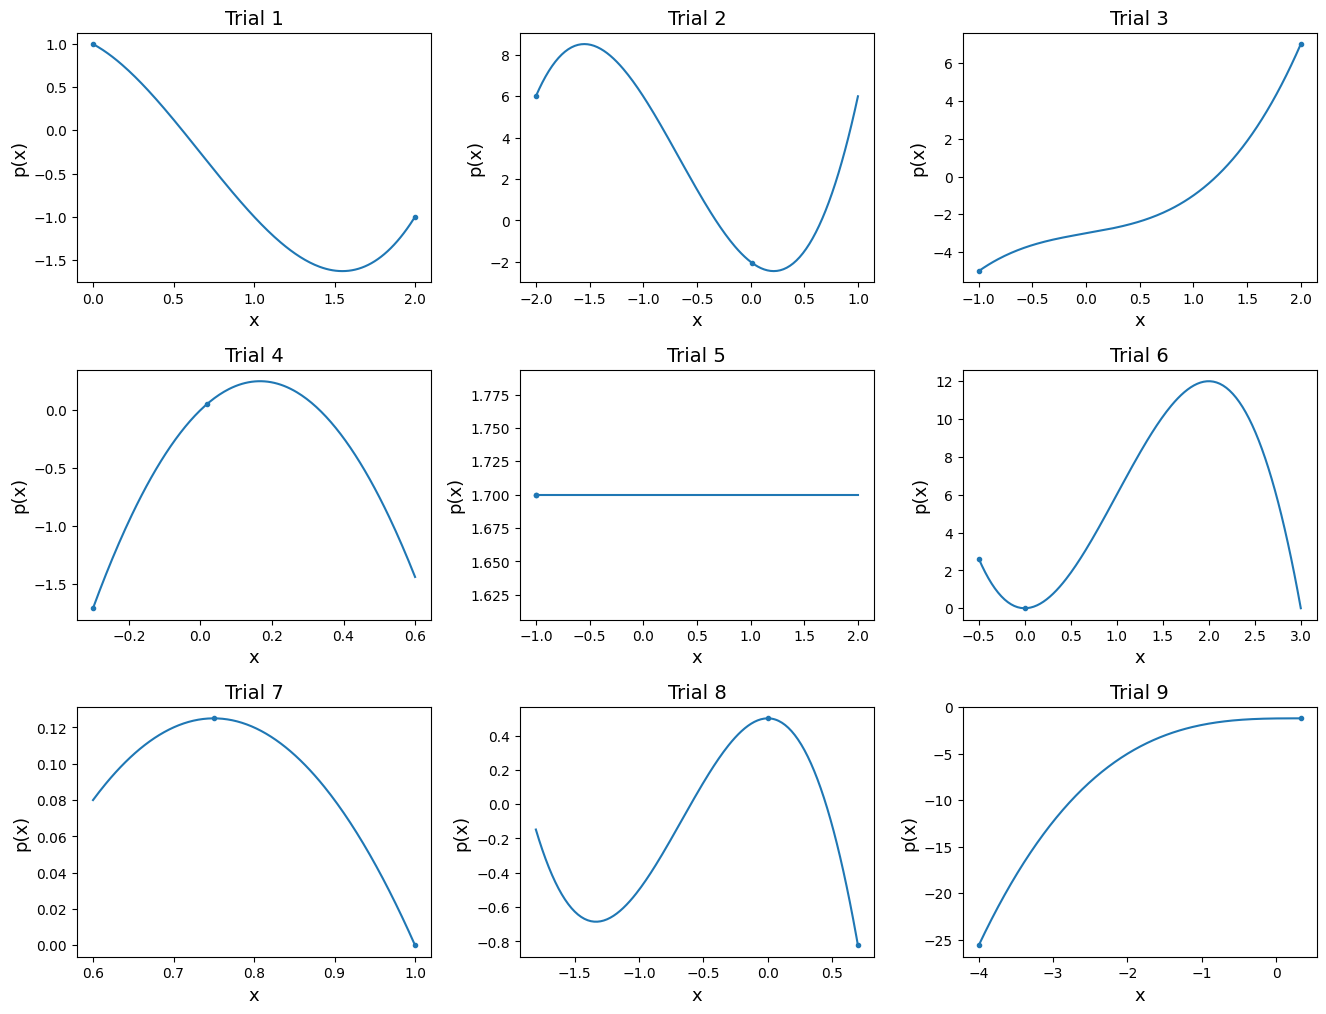

In [8]:
# here is some code to visualize your results. Just run this block

def plotPoly(interval, coeffs, plot_dat):
    a, b = interval
    nrows, ncols, idx = plot_dat
    xx = np.linspace(a,b,200)
    p = p3(coeffs,xx)
    plt.subplot(nrows, ncols, idx)
    plt.plot(xx,p)

# fig, axs = plt.subplots(3,3, figsize=(16,12))  # alternative syntax
plt.figure(figsize=(16, 12)) 

plotPoly(ab1, cc1, [3,3,1])
plotPoly(ab2, cc2, [3,3,2])
plotPoly(ab3, cc3, [3,3,3])
plotPoly(ab4, cc4, [3,3,4])
plotPoly(ab5, cc5, [3,3,5])
plotPoly(ab6, cc6, [3,3,6])
plotPoly(ab7, cc7, [3,3,7])
plotPoly(ab8, cc8, [3,3,8])
plotPoly(ab9, cc9, [3,3,9])

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.scatter(rslt[i,0:2],rslt[i,2:4],marker='.')
    # axs[int(i/3),i%3].set_title(f"Trial {i+1}",fontsize=14) # alternative syntax
    # axs[int(i/3),i%3].set_xlabel("x",fontsize=13)
    # axs[int(i/3),i%3].set_ylabel("p(x)",fontsize=13)
    plt.title(f"Trial {i+1}",fontsize=14)
    plt.xlabel("x",fontsize=13)
    plt.ylabel("p(x)",fontsize=13)
    
plt.subplots_adjust(wspace=0.25,hspace=0.35)
plt.show()

We are looking for global extrema of a cubic polynomial over a bounded interval [a,b]. We know
from calculus that the global extrema occur at critical points or endpoints. So we create an array
xx of candidates for the extrema and add a and b to this list. Next we find all critical points of
the polynomial over the real line (there are at most two) and append those that lie in the interval
[a,b] to the list of candidates. To find critical points, we are looking for real zeros of the quadratic
equation 

$$ p'(x) = 3cx^2 + 2dx+ e= 0. $$

We start by testing whether c = 0. If so, then p'(x) is at most a linear function, so it will have at
most one real zero. If d = 0 and e = 0, then p(x) is constant, and any point in the interval is a
critical point. But the endpoints will also be viable maxima and minima, so there is no need to add
additional candidate points to our list. Similarly, if d = 0 and e $\neq$ 0 (still assuming c = 0), then
there are no critical points on the real line, so also none in the interval [a,b]. Thus, the endpoints are
the only candidates. If c = 0 and d $\neq$ 0, there is one critical point on the real line, at x = −e(2d),
and we add it to our list of candidates if that number is between a and b.

Next we move on to the case of c $\neq$ 0. Then p′(x) is a genuine quadratic function, and the quadratic
formula gives its two (possibly complex or double) roots. We start by computing the discriminant
5 = ∆ = (2d)$\texttwosuperior$ − 4(3c)(e). If ∆ = 0, the quadratic formula gives a double root at −(2d)/(2(3c)), which
we check to see if it is between a and b and add it to the list if so. If ∆ <0, the roots of p′(x) are
complex and p(x) will be a monotonically increasing or decreasing function; hence, we do not add
any candidates to our list in this case. (This case is not explicitly coded since there is no action to
take). Finally, if ∆ >0, the two versions of the quadratic formula are

$$x_{\pm} = \frac{−(2d) \pm \sqrt∆}{2(3c)} = \frac{2e}{−2d∓√∆}$$

If d < 0, we use $x_{+}$ = $\frac{−(2d) + \sqrt∆}{6c)}$ and $x_{-}$ = $\frac{2e}{−2d+√∆}$ to avoid cancelling terms of opposite signs. Similarly, if d ≥ 0, we use $x_{-}$ = $\frac{−(2d) - \sqrt∆}{6c)}$ and $x_{+}$ $\frac{2e}{−2d-√∆}$. In either case, we check each of $x_{+}$ and $x_{-}$ to see if they lie in the interval [a,b] and add them to the list of candidates if they do. 

Once we have the candidates, we find the max and min and return the locations where they occurred
as well as their numerical values.

# Part 2a. (5 points)  Running error analysis for evaluating  $e^x$

Recall that $f(x)=e^x$ has the Taylor expansion

$$f(x) = \sum_{n=0}^\infty \frac{x^n}{n!} = 1 + x + \frac{x^2}{2} + \frac{x^3}{6} + \cdots$$

Our goal in this problem will be to derive a running error estimate when this series is evaluated as written. The function exp_v1(x) below computes the partial sums

$$s_n=\sum_{j=0}^n t_j, \qquad\quad t_n=\frac{x^n}{n!},$$

until $n$ is large enough that $|t_n|\le s_n u$, and returns $s_n$. Of course, what we actually compute are $\hat s_n$ and $\hat t_n$, which contain floating-point errors. Using the example of $\log(1+x)$ from Lecture 5 as a guide, derive a running error estimate

$$|e_n|\le r_n, \qquad e_n=\hat s_n - s_n, \qquad r_n=r_{n-1}+???$$

and incorporate it into the starter code below, so that it returns both $s=s_n$ and $r=r_n$. Also use the error estimate to exit the 'while' loop early if possible.

Use your code to make two plots. In both plots, for the $x$-axis, choose 501 equally-spaced points $x_j$ between $x_0=-25$ and $x_{500}=25$. Let [$s_j$,$r_j$]=exp_v1($x_j$). Note that the subscript $j$ on $s$ and $r$ has a different meaning outside of the function exp_v1(x) than inside. For each $x_j$, also compute the ``exact'' result $f_j$=math.exp($x_j$), and the scale factor $m_j=\max\big(|s_j|,f_j\big)$. One plot should show $\log_{10}(|s_j|)$ and $\log_{10}(f_j)$ versus $x_j$.  The other plot should show the relative error bound $\log_{10}(r_j/m_j)$ and the actual relative error $\log_{10}(|s_j-f_j|/m_j)$ versus $x_j$.  (Each plot has two curves. See the sample plot in 2b below as a guide.) To avoid issues with taking the log of zero, increase the argument slightly, e.g., plot

$$\log_{10}(10^{-16}+\,\cdot\,),$$

where $\cdot$ stands for $|s_j|$, $f_j$, $r_j/m_j$ or $|s_j-f_j|/m_j$.  You'll discuss the results after part 2b below.
  

**Deliverables**:

- Incorporate your running error analysis into the code for exp_v1 provided below
- Include the two plots described above. Be sure to label your axes and give the plots titles
- Include the code you wrote to make the plots
- Include a writeup deriving your formula for $r_n$

In [9]:
def exp_v1(x):
    u = 1.11e-16
    fac = 0.1   # safety factor to avoid breaking out of the while loop too early if the bound is poor
    t = x 
    s = 1+x 
    n = 1
    r = abs(s)*u
    while abs(t) > abs(s)*u:
        n = n+1
        t *= x/n
        s += t 
        # replace this line with the correct update of r
        r += (abs(s) + (2*n-3)*abs(t))*u
        if abs(t) < r*fac:
            break
    
    # print(n)
    return [s,r]

In [10]:
# sanity check.  (x was chosen arbitrarily)
x = -5.2; exp_v1(x)

[0.0055165644207598764, 1.5976793107484335e-13]

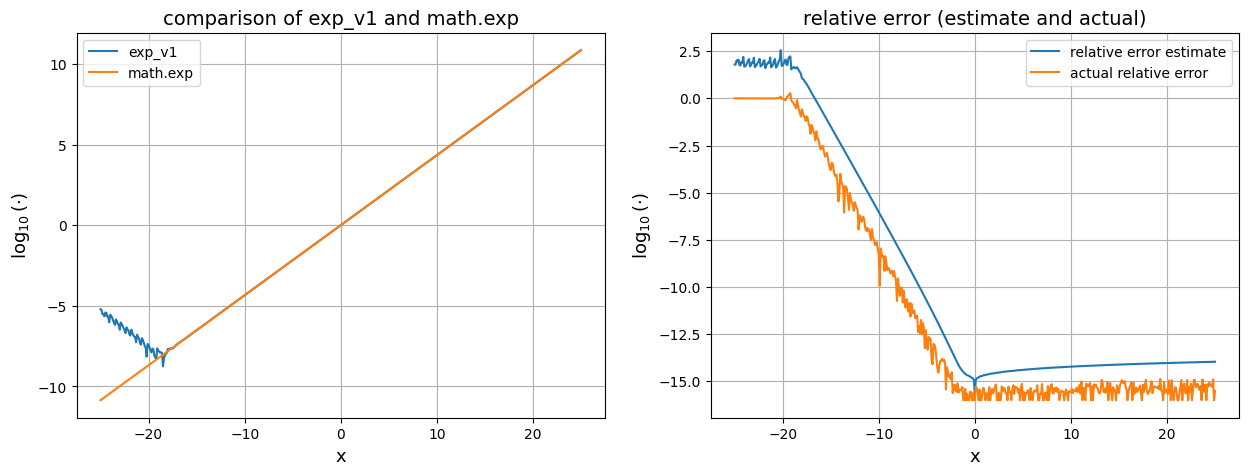

In [11]:
### your code to generate the plots ###
def test_exp(x,rslt):
# in hindsight, probably not the simplest approach to combine this into one routine
    s,r = rslt
    ex = math.exp(x)
    mx = max(ex,abs(s))
    er1 = r/mx
    er2 = (s-ex)/mx
    return np.array([s,ex,er1,er2])
    
xx = np.zeros((501,5))
yy = np.zeros((501,4))
xx[:,0] = np.linspace(-25,25,501).T
for i in range(0,501):
    rslt = exp_v1(xx[i,0])
    xx[i,1:] = test_exp(xx[i,0],rslt)
    for j in range(4):
        yy[i,j] = math.log10(1.0e-16+abs(xx[i,j+1]))
        
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(xx[:,0],yy[:,0], label="exp_v1");
plt.plot(xx[:,0],yy[:,1], label='math.exp')
plt.grid()
plt.legend()

plt.title("comparison of exp_v1 and math.exp",fontsize=14)
plt.xlabel("x",fontsize=13)
plt.ylabel(r"$\log_{10}(\cdot)$",fontsize=13)

plt.subplot(1,2,2)
plt.plot(xx[:,0],yy[:,2], label='relative error estimate');
plt.plot(xx[:,0],yy[:,3], label='actual relative error');
plt.grid()
plt.legend()

plt.title("relative error (estimate and actual)",fontsize=14)
plt.xlabel("x",fontsize=13)
plt.ylabel(r"$\log_{10}(\cdot)$",fontsize=13);

As usual, we will use a hat to denote the results carried out in floating-point arithmetic and let $e_{n}$ = $\hat{s_{n}} - s_{n}$.

The algorithm begins by assigning t= x, s= 1 + xand n= 1. There are no errors associated with t yet, so we have

$$\hat{t_{1}} = t_{1} = x,$$
$$\hat{s_{1}} = \frac{s_{1}}{1 + δ} \rightarrow \hat{s_{1}} = s_{1} - δ\hat{s_{1}},  e_{1} = -δ\hat{s_{1}}, |e_{1}| ≤ |\hat{s_{1}}|u.$$

On subsequent iterations, we will show by induction that

$$\hat{t_{n}} = \frac{t_{n}}{α_{2n-3}}, (n≥2)$$

Indeed,
$$\hat{t_{2}} = fl((x/2)\hat{t_{1}}) = \frac{(x/2)t_{1}}{1 + δ} = \frac{t_{2}}{α_{1}},$$

$$\hat{t_{n}} = fl((x/2)\hat{t_{n-1}}) = \frac{(x/n)}{1 + δ} \cdot \frac{t_{n}}{α_{2(n-1)-3}} \cdot \frac{1}{1 + δ} = \frac{t_{n}}{α_{2n-3}}, (n ≥ 3).$$

Here we made use of the fact that x/2 is machine-representable when x is, so there is no rounding error in the first division. If you don’t do this, you’ll get a similar result, but with $α_{2n-2}$ instead of $α_{2n-3}$ in the denominator. Expanding out $α_{2n-3} = 1 + θ_{2n-3}$, we obtain
$$\hat{t_{n}} = t_{n} - \hat{t_{n}}θ_{2n-3}, (|θ_{2n-3}| ≤ γ_{2n-3}).$$

Next we compute
$$\hat{s_{n}} = fl(\hat{s_{n-1}}+\hat{t_{n}}) = \frac{\hat{s_{n-1}}+\hat{t_{n}}}{1 + δ} \rightarrow \hat{s_{n}} = \hat{s_{n-1}} + \hat{t_{n}} - δ\hat{s_{n}}.$$

Substitution of $\hat{s_{n}} = s_{n} + e_{n}, \hat{s_{n-1}} = s_{n-1} + e_{n-1}, \hat{t_{n}} = t_{n} - \hat{t_{n}}θ_{2n-3}, and s_{n} = s_{n-1} = t_{n} gives$
$$ e_{n} = e_{n-1} - \hat{t_{n}}θ_{2n-3} - δ\hat{s_{n}}.$$

Finally, the triangle inequality gives,
$$|e_{n}| ≤ |e_{n-1}| + |\hat{t_{n}}|γ_{2n-3} + |\hat{s_{n}}|u, (n ≥ 2).$$

Combined with the initial result $|e_{1}| ≤ |\hat{s_{1}}|u,$ the simple induction argument from lecture 4 gives:
$$|e_{n}| ≤ r_{n}, (n≥1),$$
where
$$r_{1} = |\hat{s_{1}}|u,$$
$$r_{n} = r_{n-1} + |\hat{t_{n}}|γ_{2n-3} + |\hat{s_{n}}|u, (n≥2).$$

This is the desired running error estimate. In the code, I replaced $γ_{2n−3}$ by (2n−3)u, which is a very good approximation. We see from the plots that the actual error follows the same trend predicted by the error bound, but is 1-2 orders of magnitude smaller, which is to be expected from a worst-case analysis via the triangle inequality.

## Part 2b. (7 points)  Improving the algorithm

One option to handle $x < 0$ with $|x|$ large is to make use of $e^{-x} = \frac{1}{e^x}$. Here we will explore an alternative method in which the series is accumulated from back to front (similar to Horner’s rule for evaluating polynomials, which means grouping the terms as in p3(x) in Part 1 above). We first assume $|x| \leq 1/2$ and check
that in this range,

$$\frac{x^{16}}{16!} \leq \frac{(0.5)^{16}}{16!}\leq \big(1.2 \times 10^{-18}\big) e^{−0.5} \leq \big(1.2 \times 10^{−18}\big)e^x, \qquad\quad
\Big( |x|\le \frac12 \Big)$$

so we are safe to truncate the series at 15th order to achieve double-precision accuracy. Here is the new algorithm, along with a running error estimate.

In [14]:
def exp_v2(x):
    u = 1.11e-16
    s = 1.0
    r = 0.0
    n = 15
    while n > 0:
        t = x/n 
        r = abs(t) * (r + 2*s*u)
        s = 1 + s*t 
        r += s*u
        n = n-1
    
    return [s,r]

Next we need to extend the input range from $|x| \leq 0.5$ to any $x$ (for which $e^x$ doesn't overflow or underflow). Here, we use the fact that $2^k = e^{k \ln 2}$. The idea is to

- find the integer $k$ for which $k\ln2$ is as close as possible to $x$
- set $y=x-k\ln2$
- compute $e^y$ using exp_v2
- correct the result by multiplying by $2^k.$

Here is an implementation of the algorithm:

In [15]:
def exp_v3(x):
    if abs(x) <= 0.5:
        return exp_v2(x)
    u = 1.11e-16
    lg2 = math.log(2)
    k = round(x/lg2)
    a = k*lg2 
    y = x - a
    # print(y)
    [s,r] = exp_v2(y)
    fac = 2**k 
    s *= fac
    r *= fac 
    r += s*(abs(y) + 2*abs(a))*u 
    return [s,r]

In [16]:
# sanity check
exp_v3(-20)

[2.0611536224385595e-09, 9.51932391076376e-24]

**Deliverable** (1 point): Write code to generate the following plot. This is just repeating the second plot from 2a, but using exp_v3 instead of exp_v1 to compute values.

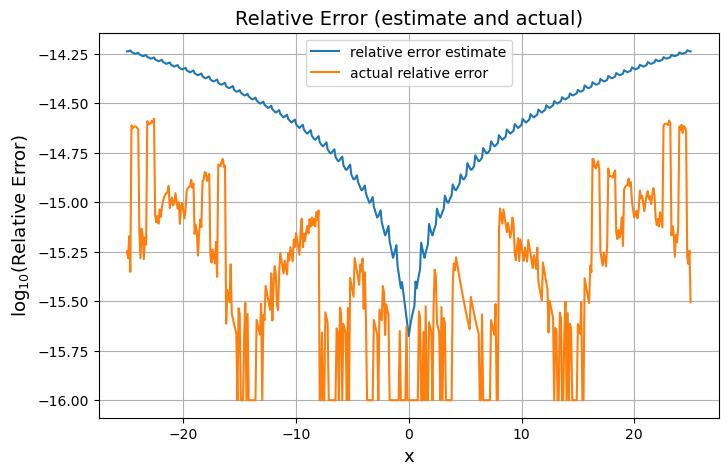

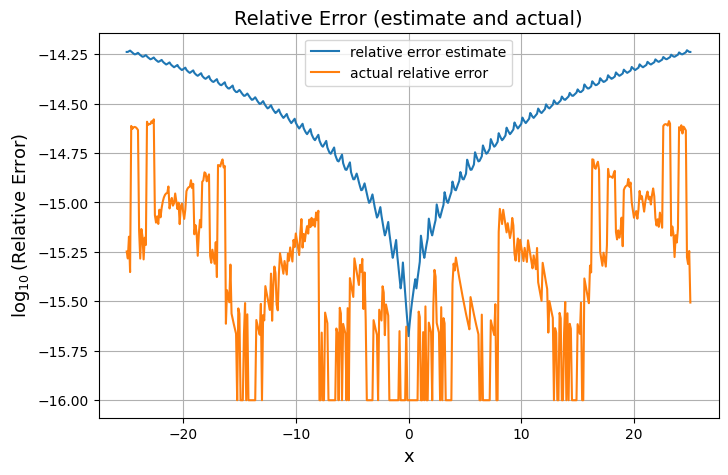

In [17]:
### YOUR CODE TO GENERATE THE PLOT GOES HERE ###

for i in range(0,501):
    rslt = exp_v3(xx[i,0])
    xx[i,1:] = test_exp(xx[i,0],rslt)
    for j in range(4):
        yy[i,j] = math.log10(1.0e-16+abs(xx[i,j+1]))

plt.figure(figsize=(8, 5))
plt.plot(xx[:,0],yy[:,2], label='relative error estimate');
plt.plot(xx[:,0],yy[:,3], label='actual relative error');
plt.grid()
plt.legend()
plt.title("Relative Error (estimate and actual)",fontsize=14)
plt.xlabel("x",fontsize=13)
plt.ylabel(r"$\log_{10}$(Relative Error)",fontsize=13);

**Deliverable** (6 points): Discuss the results of parts 2a and 2b by answering these questions:

- What do you notice about the scale of the y-axis and the tightness of the error bounds in the graphs for 2a vs 2b?
- In exp_v2(x), we assume $|x|\le0.5$. How big can $|y|$ be when exp_v2(y) is called in exp_v3(x) with $|x|>0.5$? What value of $y$ comes up when computing exp_v3(-20)?
- Ignore the errors in computing and rounding $x^n/n!$ and suppose all the error in the following sums comes from adding the terms from left to right and rounding each intermediate result in double-precision. With this simplification, derive estimates for the absolute error using our $\alpha_n,\theta_n,\gamma_n$ notation and write a simple "for loop" in python to evaluate your bounds on the absolute error. You can set $\gamma_n=nu$ in your final formulas. (The upper limits 66 and 10 are what exp_v1 actually does with $x=-20,20,0.1$.)

exp_v1(-20) = $1 - \frac{20}1 + \frac{20^2}2 - \frac{20^3}6 + \frac{20^4}{24} + \cdots + \frac{20^{66}}{66!}$

exp_v1(20) = $1 + \frac{20}1 + \frac{20^2}2 + \frac{20^3}6 + \cdots + \frac{20^{66}}{66!}$

exp_v1(0.1) = $1 + \frac{0.1}1 + \frac{(0.1)^2}2 + \frac{(0.1)^3}6 + \cdots + \frac{(0.1)^{10}}{10!}$

exp_v2(0.1) = $\frac{(0.1)^{15}}{15!} + \frac{(0.1)^{14}}{14!} + \cdots +
\frac{(0.1)^2}2 + \frac{0.1}1 + 1$

- divide each of these absolute error bounds by $e^{-20}$, $e^{20}$ or $e^{0.1}$ (computed via math.exp) to obtain numerical values bounding the relative error of the above sums.

- Explain in words why the relative errors in part 2a grow so much as $x\to-25$ but stay small as $x\to+25$. And when $|y|\le0.5$, why does it not matter much (for relative errors) if $y$ is positive or negative? (This is true whether evaluating exp_v1(y) or exp_v2(y))

- What is the additional benefit of using Horner's rule to evaluate exp_v2(y) when $|y|\le0.5$, instead of evaluating exp_v1(y), which sums the series in the order 1 + y + y^2/2 + ... ?


- I notice that the actual errors range from $10^−16 to O(1) in part 2a but are confined to a much tighter interval, 10^−16 to 10^−14.5$, in part 2b.
- To find y, we divide x by log 2 ≈ 0.69314718, round to the nearest integer k, and set y = x − k log 2. Rounding means $|\frac{x}{log2} - k| ≤ \frac{1}{2},$ which implies that y is in the range $[-\frac{1}{2}log2, \frac{1}{2}log2] ≈ [−0.3465736,0.3465736].$ When evaluating exp_v3(-20), we have $\frac{x}{log2}$ = -28.854, so k = −29 and y = −20−(−29) log 2 ≈ 0.101268236.
-  In this simplified error analysis, the first three sums are of the form $\sum_{k=0}^{n} \frac{x^k}{k!}$, and we only pay attention to errors generated by addition, so we have
  $$fl(\sum_{k=0}^{n} \frac{x^k}{k!}) = (1)α_{n} + \sum_{k=1}^{n} \frac{x^k}{k!}α_{n-k+1}$$
where we note that the zeroth term is involved in n additions while the $k$th term for $1 ≤ k ≤ n$ is involved in $n - k +1$ additions. Thus, by the triangle inequality,
$$|fl(\sum_{k=0}^{n} \frac{x^k}{k!}) - \sum_{k=0}^{n} \frac{x^k}{k!}| = |(α_{n} - 1) + \sum_{k=1}^{n} \frac{x^k}{k!}(α_{n-k+1} - 1)| ≤ γ_{n} + \sum_{k=0}^{n} \frac{|x|^k}{k!}γ_{n-k+1}.$$
The result is the same for x = 20 as for x =−20 since the absolute value of x appears in the error bound. Using the code below, the bounds on the absolute error for the first 3 sums evaluate to
$$x= −20, n= 66 : \text{abs error} ≤ 2.531 ×10^−6$$
$$x= −20, n= 66 : \text{abs error} ≤ 2.531 ×10^−6$$
$$x= 0.1, n= 10 : \text{abs error} ≤ 1.226 ×10^−15$$

For the fourth sum, the smallest terms are summed first, which leads to the error bound
$$|fl(\text{reverse order} \sum_{k=0}^{n} \frac{x^k}{k!}) - \sum_{k=0}^{n} \frac{x^k}{k!}| = |\frac{x^n}{n!}(α_{n} - 1) + \sum_{k=0}^{n-1} \frac{x^k}{k!}(α_{k+1} - 1)| ≤ \frac{|x|^n}{n!}γ_{n} + \sum_{k=0}^{n-1} \frac{|x|^k}{k!}γ_{k+1}.$$

Using the code below, the bound for the fourth sum evaluates to 
$$ x= 0.1, n= 15 : \text{abs error} = 1.349 ×10^−16$$

- To convert these absolute errors into relative errors, we divide by $e^-20, e^20, \text{or} e^0.1$:
$$x= −20,n= 66 : \text{rel error} ≤ 1.228 ×10^3$$
$$x= 20,n= 66 : \text{rel error} ≤ 5.217 ×10^−15$$
$$x= 0.1,n= 10 : \text{rel error} ≤ 1.109 ×10^−15$$
$$x= 0.1,n= 15,\text{reverse order : rel error} ≤1.221 ×10^−16$$

- In words, when the magnitude of xis large in the series for ex, we are accumulating sums with
many entries that are large in absolute value. When xis positive, they combine constructively,
leading to a large value in the denominator when the relative error is computed. As a result,
the relative error remains small as x $\rightarrow$ +25. But when x is negative, they combine to a
small number, which can be completely drowned out compared to the roundoff errors that
occur as we accumulate the sums. Note that dividing by $e^x$ in the case of x =−20 above
led to a relative error bound of 1228, so there are not expected to be any correct digits at
all in the computed answer. What happened here is that the largest term in the sum is $20^20/20! = 4.3 ×10^7$ while the final result is only $e^−20 = 2.06 ×10^−9.$ So even if that largest
term contributes a roundoff error of only $(4.3 ×10^7)u with u= 1.11 ×10^−16,$ that single error will be twice as big as the result we are trying to compute. But if $|y| ≤ 0.5$, then successive
terms in the sum
$$ e^y = \sum_{k=0}^{n} \frac{y^k}{k!} $$
get smaller and smaller — note that
$$ \frac{y^{k+1}}{(k+1)!} = (\frac{y^k}{k!})\frac{y}{k+1},$$
and $|\frac{y}{k+1}| ≤ \frac{1}{2}$ This means there are no large individual terms in the sums. Also, we divide by $e^y$ at the end with $y ∈ [−0.5,0.5]$, and this ranges between 0.6065 and 1.65, so we will not divide by a small number at the end when converting the absolute error to a relative error.

- With Horner’s rule, by accumulating the small terms first, the large terms are involved in fewer arithmetic operations, so there will be a smaller factor $γ_{n}$ multiplying the largest terms. In the example of y = 0.1, this leads to the error bound being about 10 times tighter in the case of computing $e^0.1$ via exp_v2(0.1) instead of exp_v1(0.1).

In [24]:
# your code to evaluate bounds on the absolute errors of the four sums,
#  under the simplifying assumption that computing and storing x^n/n! does
#  not contribute any errors, goes here. Also compute the relative errors.
def simple_bound_fwd(x,n):
    u = 1.11e-16 # machine epsilon
    x = abs(x)
    t = 1
    r = n*u
    for k in range(1,n+1):
        t *= x/k
        r += t*(n-k+1)*u
    return r
print( simple_bound_fwd(20,66) )
print( simple_bound_fwd(0.1,10) )

def simple_bound_reverse(x,n):
    u = 1.11e-16 # machine epsilon
    x = abs(x)
    t = 1
    r = u
    for k in range(1,n+1):
        t *= x/k
        r += t*(k+1)*u # round up \gamma_n to \gamma_{n+1} on the final term
    return r
print( simple_bound_reverse(0.1,15) )

2.531106824341876e-06
1.2261462937797261e-15
1.3494136909703656e-16


In [25]:
print( 2.531106824341876e-06 / math.exp(-20) )
print( 2.531106824341876e-06 / math.exp(20) )
print( 1.2261462937797261e-15 / math.exp(0.1) )
print( 1.3494136909703656e-16 / math.exp(0.1) )

1228.00493703488
5.216999999771212e-15
1.1094630465980085e-15
1.2209999999999998e-16
